# Example for smoothness function -- it quantifies how smooth a 1d dataset is

In [2]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from positive import *
from positive.physics import pn
from positive.maths import lim
from matplotlib.pyplot import *
from numpy import *
?smoothness

(positive)>> Applying custom matplotlib settings.


## Consider Mock Data

1410 2000


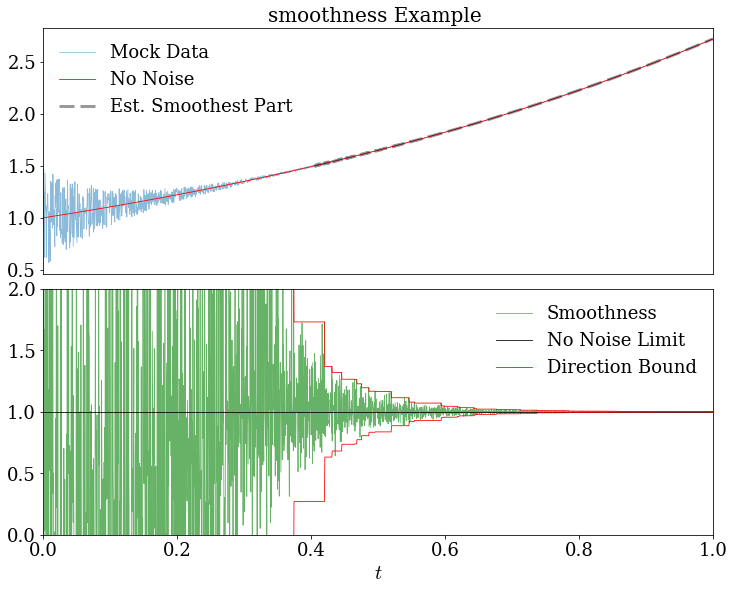

In [11]:

# Generate noisless data 
t = linspace(0,1,2e3)
y0 = exp( t )

# Add noise that turns off slowly
ns = 0.5*random.uniform(-1,1,y0.size)
y = y0 + exp(-t*10)*ns

# 
figure( figsize=2*figaspect(0.8) )

#
subplot( 2,1,1 )
plot( t, y, alpha=0.5, label='Mock Data' )
plot( t, y0, 'r', label='No Noise' )
xlim( lim(t) )
xticks([])

# Estimate the smoothest part 
lamp = smoothest_part( y, smoothness_tolerance=0.05, smooth_length=0 )
plot( t[lamp], y[lamp], color='k', lw=3, alpha=0.4, ls='--', label='Est. Smoothest Part' )

#
legend()
title('smoothness Example ')

# Compute measure of "how smooth" the mock data is as a function of its domain
x = smoothness(y)

#
g = upbow(abs(x)[::-1])[::-1]

#
subplot( 2,1,2 )
plot( t, x, color='g', alpha=0.6, label='Smoothness' )
axhline(1,color='k', label='No Noise Limit')
plot( t, g, 'r', label='Direction Bound' )
plot( t,-g+2, 'r' )
ylim([0,2])
xlim( lim(t) )
legend(loc=1)
xlabel('$t$')

#
tight_layout(0)

savefig('/Users/book/KOALA/positive_dev/gallery/smoothness_example.pdf')
